In [2]:
import ROOT, rat
import os, sys
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
sys.path.append('/home/jp/projects/python_tools')
import jp_mpl as jplot
import rat

TClass::TClass:0: RuntimeWarning: no dictionary for class omtext is available


In [3]:
import rat

In [4]:
infile_dir = '/home/jp/projects/snoplus/rundir/profiling_official_greydisc_geo/testing'

In [5]:
infile_name = 'profiler_greydisc.root'

In [10]:
try:
    ratreader.close()
    print 'Closing file before reopenning'
except:
    print 'No ratreader file. Opening it for the first time'
ratreader = rat.dsreader(os.path.join(infile_dir, infile_name))

Closing file before reopenning


In [11]:
def doRead():
    photons_steps = [] # List of tracks
    photons_p     = []
    photons_ids   = []
    end_volume    = []
    process       = []
    energy        = []
    for ds, run in ratreader:
        mymc = ds.GetMC()
        for itrack in range(mymc.GetMCTrackCount()):
            mytrack = mymc.GetMCTrack(itrack)
            
            # End here to study the info in a track
            # return mytrack
            
            end_volume.append([])
            process.append([])
            photons_steps.append(np.zeros(3))
            photons_p.append(np.zeros(3))
            
            photons_ids.append(mytrack.GetTrackID())
            
            pdg_code = mymc.GetMCTrack(itrack).GetPDGCode()
            #if pdg_code != 22: 
            #    # Particle is not a gamma
            #    continue
            
            for istep in range(mymc.GetMCTrack(itrack).GetMCTrackStepCount()):
                photons_steps[-1] = np.vstack((photons_steps[-1], np.zeros(3)))
                photons_p[-1] = np.vstack((photons_p[-1], np.zeros(3)))

                mystep = mymc.GetMCTrack(itrack).GetMCTrackStep(istep)
                position = mystep.GetPosition()
                momentum = mystep.GetMomentum()
                position.GetXYZ(photons_steps[-1][-1,:])
                momentum.GetXYZ(photons_p[-1][-1,:])
                end_volume[-1].append(mystep.GetEndVolume())
                process[-1].append(mystep.GetProcess())
                if istep == 0:
                    energy.append(mystep.GetKineticEnergy())
                
    ratreader.close()
    
    hcvalue = 1.239841 # eV*um (electronvolts times micrometer)
    wlen = 1E+3*hcvalue/(np.array(energy)*1E+6)
    
    return photons_steps, photons_p, end_volume, \
           process, wlen, np.array(photons_ids)

In [12]:
pos, mom, vol, proc, wlen, ids = doRead()

In [23]:
# Following a photon
search_id = 204
index = np.where(ids==search_id)[0][0]
print 'Position'
print pos[index]
print 'Momentum'
print mom[index]
print 'Processes'
print proc[index]
print 'Volumes'
print vol[index]

Position
[[    0.             0.             0.        ]
 [-1398.90698242   769.77008057   -74.7129364 ]
 [-4015.37084961  4390.76220703  -811.19091797]
 [-4047.38012695  4435.04150391  -820.19567871]
 [-5385.33203125  6340.79199219 -1211.6072998 ]
 [-5385.95947266  6341.68554688 -1211.79089355]]
Momentum
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [ -1.71335830e-06   2.37116092e-06  -4.82273322e-07]
 [ -1.71385250e-06   2.37083168e-06  -4.82135249e-07]
 [ -1.68003794e-06   2.39301085e-06  -4.91487413e-07]
 [ -1.68003794e-06   2.39301085e-06  -4.91487413e-07]
 [ -1.68003794e-06   2.39301085e-06  -4.91487413e-07]]
Processes
['Scintillation', 'Transportation', 'Transportation', 'Transportation', 'G4FastSimulationManagerProcess']
Volumes
['inner_av', 'av', 'cavity', 'innerPMT_pmtenv3949', 'innerPMT_pmtenv3949']


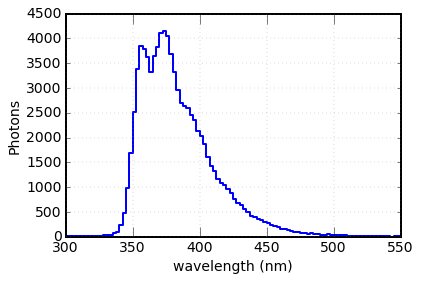

In [16]:
# Making a histogram of the track energies
xaxis = np.linspace(300, 550, 101)
n, x = np.histogram(wlen, xaxis)
jplot.unfilledBar(xaxis, n)
plt.xlabel('wavelength (nm)')
plt.ylabel('Photons')

In [8]:
# Run this to study the info in a track
track = doRead()